# Import and Prepare the Data

In [1]:
# When we work with files in Python we will be using the Pandas library. 
# In order to access different functions and methods inside of the library we must first import it into our project. 
#
import pandas as pd

In [2]:
# We can use the new 'pd' reference and run the read_csv function from within Pandas to import our data as follows:
# We will name the dataframe 'credit'.
credit = pd.read_csv('default of credit card clients.csv', header =1)
#
# Note that the first row of the data file is excluded.

In [3]:
# Use the get_dummies() function within pandas to convert non-numeric columns to a series of binary numeric 'Dummy' columns
credit1 = pd.get_dummies(credit)
# Print credit
credit1

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,0,1,1,0
1,2,120000,2,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
2,3,90000,2,34,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
3,4,50000,1,37,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
4,5,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,39,0,0,0,0,0,0,...,5000,1000,0,1,0,1,0,0,0,1
29996,29997,150000,2,43,-1,-1,-1,-1,0,0,...,0,0,0,1,0,1,0,0,0,1
29997,29998,30000,2,37,4,3,2,-1,0,0,...,2000,3100,0,1,0,0,0,1,1,0
29998,29999,80000,1,41,1,-1,0,0,0,-1,...,52964,1804,0,1,0,1,0,0,1,0


The categorical variables SEX and EDUCATION are now converted to dummy variables.

# Pandas-Profiling

We can also use Pandas-Profiling to quickly create an EDA-like report in just one line of code! 
To do this, we'll need to import the pandas-profiling library into work environment.
Go to https://anaconda.org/conda-forge/pandas-profiling for installation instruction

In [ ]:
# import pandas-profiling library
import pandas_profiling

In [ ]:
# Now we can use the library on our data frame
pandas_profiling.ProfileReport(credit1)

This is really a great tool to provide basic statistical analyses on all the variables: key summaries and visualization, including graphically shown at least 4 different correlations, pin point the highest pairwise correlated factors, etc.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt # visualize data graphically

# Correlation

Whether addressing collinearity or checking for relationships between features for selection or engineering, calculating correlation is a vital part of all Data Science projects:

In [5]:
# building a basic correlation coefficient matrix using pandas:
# Strength of correlations:
#   Very strong relationship  (|r| >= 0.8)
#   Strong relationship       (|r| >= 0.6)
#   Moderate relationship     (|r| >= 0.4)
#   Weak relationship         (|r| >= 0.2)
#   Very weak relationship    (0< |r|< 0.2)

corrMat = credit1.corr()
print(corrMat)

                                              ID  LIMIT_BAL  MARRIAGE  \
ID                                      1.000000   0.026179 -0.029079   
LIMIT_BAL                               0.026179   1.000000 -0.108139   
MARRIAGE                               -0.029079  -0.108139  1.000000   
AGE                                     0.018678   0.144713 -0.414170   
PAY_0                                  -0.030575  -0.271214  0.019917   
PAY_2                                  -0.011215  -0.296382  0.024199   
PAY_3                                  -0.018494  -0.286123  0.032688   
PAY_4                                  -0.002735  -0.267460  0.033122   
PAY_5                                  -0.022199  -0.249411  0.035629   
PAY_6                                  -0.020270  -0.235195  0.034345   
BILL_AMT1                               0.019389   0.285430 -0.023472   
BILL_AMT2                               0.017982   0.278314 -0.021602   
BILL_AMT3                               0.024354   

In [ ]:
# Create Pearson correlation matrix visualization, and limit to 2 decimal places:
corrMat.style.background_gradient(cmap='coolwarm').set_precision(2)

# CREATE NEW VARIABLES

In [ ]:
# create Age_GP by tweenties, thirties, etc
# Use floor_divide by 10 to get the tens, then multiply by 10. 
import numpy as np
credit1['AGE_GP'] = np.floor_divide(credit1['AGE'],10) * 10
credit1['AGE_GP'] 

In [ ]:
# Now we can use the library on our data frame
pandas_profiling.ProfileReport(credit)

PAY_x with x = 0, 2, 3, 4, 5 ,6 indicate about 50% are using the revolving payment.

In [6]:
# Create a variable TOTAL_BILL as the sum of all the 6 months' BILL_AMTs
credit1["TOTAL_BILL"] = credit1["BILL_AMT1"]+credit1["BILL_AMT2"]+credit1["BILL_AMT3"]+credit1["BILL_AMT4"]+credit1["BILL_AMT5"]+credit1["BILL_AMT6"]

In [7]:
# Create a variable TOTAL_PAY as the sum of all the 6 months' PAY_AMTs
credit1["TOTAL_PAY"] = credit1["PAY_AMT1"]+credit1["PAY_AMT2"]+credit1["PAY_AMT3"]+credit1["PAY_AMT4"]+credit1["PAY_AMT5"]+credit1["PAY_AMT6"]

In [8]:
# Add 2 to each PAY_x, so all will be non-negative. 
# Create a variable PAY_STAT1
credit1["PAY_STATUS"] = credit1["PAY_0"]+credit1["PAY_2"]+credit1["PAY_3"]+credit1["PAY_4"]+credit1["PAY_5"]+credit1["PAY_6"]+12

# Factors affecting Default

In [9]:
#reload file with some data manipulation
df = pd.read_csv('default of credit card clients_analysis.csv', header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_Status,TOT_BILL,TOT_PAY,PAY_0,...,exPAY_2,exPAY_3,exPAY_4,exPAY_5,exPAY_6,exPAY_positive,exPAY0,eXPAY-1,exPAY-2,TOT_SPEND
0,1,20000,female,university,1,24,13,7704,689,2,...,0,0,-2,-2,-2,0,3,0,3,4602
1,2,120000,female,university,2,26,15,17077,5000,-1,...,0,0,1,0,2,2,4,0,0,5682
2,3,90000,female,university,2,34,12,103171,11018,0,...,0,0,0,0,0,0,6,0,0,35257
3,4,50000,female,university,1,37,10,233334,8388,0,...,0,0,0,0,0,0,6,0,0,54378
4,5,50000,male,university,1,57,10,111339,59049,-1,...,-1,0,0,0,0,0,5,1,0,66987


In [10]:
# Use the get_dummies() function within pandas to convert non-numeric columns to a series of binary numeric 'Dummy' columns
df = pd.get_dummies(df)
df.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_Status,TOT_BILL,TOT_PAY,PAY_0,PAY_2,PAY_3,...,exPAY-2,TOT_SPEND,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1,20000,1,24,13,7704,689,2,2,-1,...,3,4602,1,0,0,0,0,1,1,0
1,2,120000,2,26,15,17077,5000,-1,2,0,...,0,5682,1,0,0,0,0,1,1,0
2,3,90000,2,34,12,103171,11018,0,0,0,...,0,35257,1,0,0,0,0,1,0,1
3,4,50000,1,37,10,233334,8388,0,0,0,...,0,54378,1,0,0,0,0,1,0,1
4,5,50000,1,57,10,111339,59049,-1,0,-1,...,0,66987,0,1,0,0,0,1,0,1


In [13]:
df1=df.drop(['SEX_male','EDUCATION_other','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','Spend_1','Spend_2','Spend_3','Spend_4','Spend_5','Spend_6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','exPAY_1','exPAY_2','exPAY_3','exPAY_4','exPAY_5','exPAY_6','exPAY0','eXPAY-1','exPAY-2'], axis=1)

In [14]:
#look at the correlation of the new data
df1_corrMat = df1.corr()
df1_corrMat.style.background_gradient(cmap='coolwarm').set_precision(2)

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_Status,TOT_BILL,TOT_PAY,zero_PAY_AMT,ExceedCredit,exPAY_positive,TOT_SPEND,SEX_female,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,default payment next month_default,default payment next month_not default
ID,1.00,0.03,-0.03,0.02,-0.03,0.02,0.02,-0.03,0.01,-0.03,0.03,0.02,-0.03,0.02,0.00,-0.01,0.01
LIMIT_BAL,0.03,1.00,-0.11,0.14,-0.25,0.31,0.35,-0.07,-0.21,-0.25,0.38,0.02,0.26,-0.14,-0.15,-0.15,0.15
MARRIAGE,-0.03,-0.11,1.00,-0.41,0.03,-0.02,-0.01,-0.02,0.03,0.02,-0.02,-0.03,0.14,-0.11,-0.05,-0.02,0.02
AGE,0.02,0.14,-0.41,1.00,-0.06,0.06,0.04,0.01,-0.01,-0.04,0.06,-0.09,-0.10,0.23,-0.08,0.01,-0.01
PAY_Status,-0.03,-0.25,0.03,-0.06,1.00,0.19,-0.06,-0.11,0.17,0.38,0.10,-0.07,-0.13,0.05,0.10,0.21,-0.21
TOT_BILL,0.02,0.31,-0.02,0.06,0.19,1.00,0.37,-0.33,0.23,-0.09,0.87,-0.03,-0.01,-0.03,0.02,-0.02,0.02
TOT_PAY,0.02,0.35,-0.01,0.04,-0.06,0.37,1.00,-0.22,0.02,-0.14,0.70,-0.00,0.08,-0.05,-0.05,-0.10,0.10
zero_PAY_AMT,-0.03,-0.07,-0.02,0.01,-0.11,-0.33,-0.22,1.00,-0.08,0.45,-0.32,0.00,0.06,-0.00,-0.05,0.16,-0.16
ExceedCredit,0.01,-0.21,0.03,-0.01,0.17,0.23,0.02,-0.08,1.00,0.08,0.19,-0.05,-0.11,0.05,0.07,0.07,-0.07
exPAY_positive,-0.03,-0.25,0.02,-0.04,0.38,-0.09,-0.14,0.45,0.08,1.00,-0.13,-0.06,-0.08,0.04,0.05,0.23,-0.23


# Machine Learning Model

In [36]:
# Define Features and Target
X = df1.iloc[:, 1:15] # Features from 2nd to 14th columns of data frame with all rows
y = df1.iloc[:, 15:16] # Target: 16th columns of data frame with all rows

In [37]:
X.head(5)

,LIMIT_BAL,MARRIAGE,AGE,PAY_Status,TOT_BILL,TOT_PAY,zero_PAY_AMT,ExceedCredit,exPAY_positive,TOT_SPEND,SEX_female,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university
0,20000,1,24,13,7704,689,5,0,0,4602,1,0,0,1
1,120000,2,26,15,17077,5000,2,0,2,5682,1,0,0,1
2,90000,2,34,12,103171,11018,0,0,0,35257,1,0,0,1
3,50000,1,37,10,233334,8388,0,0,0,54378,1,0,0,1
4,50000,1,57,10,111339,59049,0,0,0,66987,0,0,0,1


In [38]:
y.head(5)


,default payment next month_default
0,1
1,1
2,0
3,0
4,0


In [39]:
# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 123)

In [40]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(18000, 14)
(12000, 14)


In [41]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(18000, 1)
(12000, 1)


# Logistic regression

In [42]:
# import the Logistic Regression class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# train the model on the training set
logreg.fit(X_train, y_train)


C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
# make predictions on the testing set and store the predicted response values
y_pred = logreg.predict(X_test)

# compute classification accuracy for the logistic regression model
from sklearn import metrics
# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.78075


# K nearest neighbors

In [44]:
#Import the KNeighborsClassifier class 
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model (using the value K=3)
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model with data
knn.fit(X_train, y_train)

C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [45]:
# store the predicted response values
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7435833333333334


In [46]:
# Repeat for KNN with K=5:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7574166666666666


In [47]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\cthian972\anaconda3\envs\hw\lib\sit

Text(0, 0.5, 'Testing Accuracy')

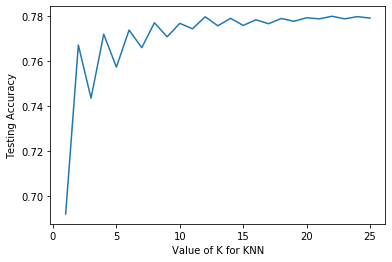

In [48]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# K-fold cross-validation

In [49]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\model_selection\_validation.

[0.74833333 0.75       0.74766667 0.75066667 0.753      0.73833333
 0.75933333 0.76166667 0.76366667 0.75933333]


In [50]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.7532


In [51]:
# search for an optimal value of K for KNN
k_range = list(range(1, 25))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\model_selection\_validation.

[0.6914333333333333, 0.7634666666666667, 0.7370666666666665, 0.77, 0.7532, 0.7715, 0.7619333333333332, 0.7741999999999999, 0.7680666666666667, 0.776, 0.7711666666666667, 0.7768999999999999, 0.7738, 0.7783666666666667, 0.7756000000000001, 0.7787666666666667, 0.7760666666666667, 0.7780666666666667, 0.7758, 0.7786666666666666, 0.7771333333333335, 0.7786000000000001, 0.7782666666666668, 0.7792]


Text(0, 0.5, 'Cross-Validated Accuracy')

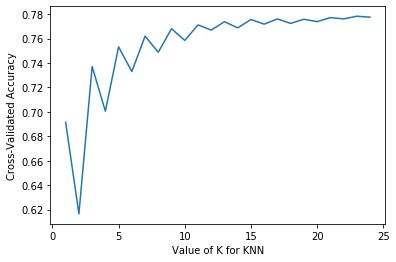

In [31]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [32]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\model_selection\_validation.

0.7738666666666667


In [33]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

0.7787999999999999


C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cthian972\anaconda3\envs\hw\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

In [54]:
# Create the RFE object and compute a cross-validated score.
from sklearn.svm import SVC
svc = SVC(kernel="linear")

In [56]:
# The "accuracy" scoring is proportional to the number of correct classifications
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')

In [57]:
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                    coef0=0.0, decision_function_shape='ovr', degree=3,
                    gamma='scale', kernel='linear', max_iter=-1,
                    probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [58]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 3


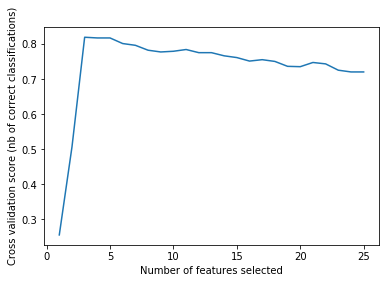

In [59]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Feature Selection to remove irrelevant features for better performance model, easier to understand and run faster